# Neural Network

We chose the neural network regression for the prediction of the demand of bikesharing rental hourly, because it is a flexible model that can capture complex relationships between the input and target variable. The drawbacks of the model are the high computational requirements and that it is like a black box, which means there is no insight to the relationships between predictors and outcome. 
In order to execute the Neural Network model Keras and Tensorflow should be installed. Here we use the same procedure as in the workshop 9 *neural networks for regression in keras*.

In [87]:
# import standard libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, ParameterGrid, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# supress versioning warnings of keras
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# import keras libraries

#from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping

### Data preparation

First, we quickly prepare the needed data and variables we want to work with.

In [88]:
# Load data
df_bike_trips = pd.read_parquet("../../data/bike_trips_hourly_FINAL.parquet")
df_bike_trips.head(2)

,starting_trips,Most_Occuring_Starting_Neighborhood,min_temp,precip,hour,month,is_weekday,season,is_holiday
index,,,,,,,,,
2016-01-01 00:00:00,26.0,109,6.7,0.0,0,1,1,4,1
2016-01-01 01:00:00,39.0,112,7.2,0.0,1,1,1,4,1


#### Define X and Y

In [89]:
# Defining inputs and output
y = df_bike_trips["starting_trips"]
X = df_bike_trips.drop("starting_trips", axis=1)

#### Train the model on the training set

Now we create our training and test split, which we will use to train the model and adjust the hyperparameters. We also normalize our data with StandardScaler().

In [90]:
# Adjusted test_size to 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
# Normalizing training data
st_scaler = StandardScaler()
st_scaler.fit(X_train)

X_train_scaled = st_scaler.transform(X_train)

## Hyperparameters

Since neural networks have a lot of hyperparameters that can be used to adjust the performance of the model, we will outline some of them in the following lines.

- Loss function
- Optimizer
- Epochs
- Batch size
- Activation function
- Number of hidden layers
- Number of nodes per hidden layer

We will be using `loss=MSE`, `optimizer=adam`, `epochs=100` (until we have adjusted all hyperparameters), `batch size=32 (default)`. 

Later we determine the best activation function, number of hidden layers and number of nodes per hidden layer through a grid search. Until then we try out both relu, tanh and sigmoid activation functions, a large amount of hidden layers and a larger amount of nodes in the hidden layer.

### Initializing the ANN

First, we create a baseline model so we can compare our performance of models with unadjusted vs. adjusted hyperparameters.

Our first model contains a `single hidden layer`, in which the `number of nodes is equal to the amount of features` we use. We also only use `one output node`, the `mean squared error loss function` and the `relu activation function`. 

In [92]:
# Defining Baseline Model
model = Sequential(
    [Dense(X_train.shape[1], activation="relu", input_shape=[X_train.shape[1]]),
     Dense(1)])

In [93]:
# Compiling the ANN
model.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [94]:
model.summary()

Model: "sequential_1176"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3531 (Dense)          (None, 8)                 72        
                                                                 
 dense_3532 (Dense)          (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [95]:
epochs = 100

history = model.fit(X_train_scaled, y_train.values,
                   epochs=epochs, validation_split=0.2)

Epoch 1/100
163/163 [==============================] - 1s 2ms/step - loss: 10980.8027 - mae: 73.7270 - mse: 10980.8027 - val_loss: 11189.5566 - val_mae: 75.9122 - val_mse: 11189.5566
Epoch 2/100
163/163 [==============================] - 0s 1ms/step - loss: 10634.1670 - mae: 71.9747 - mse: 10634.1670 - val_loss: 10698.8203 - val_mae: 73.6146 - val_mse: 10698.8203
Epoch 3/100
163/163 [==============================] - 0s 1ms/step - loss: 10033.9082 - mae: 69.1394 - mse: 10033.9082 - val_loss: 9939.1436 - val_mae: 70.1792 - val_mse: 9939.1436
Epoch 4/100
163/163 [==============================] - 0s 1ms/step - loss: 9194.8984 - mae: 65.2698 - mse: 9194.8984 - val_loss: 8966.8457 - val_mae: 65.7965 - val_mse: 8966.8457
Epoch 5/100
163/163 [==============================] - 0s 1ms/step - loss: 8180.3701 - mae: 60.5434 - mse: 8180.3701 - val_loss: 7845.5747 - val_mae: 60.7066 - val_mse: 7845.5747
Epoch 6/100
163/163 [==============================] - 0s 1ms/step - loss: 7116.9380 - mae: 55.

163/163 [==============================] - 0s 1ms/step - loss: 3865.9587 - mae: 44.7674 - mse: 3865.9587 - val_loss: 3764.6101 - val_mae: 44.4059 - val_mse: 3764.6101
Epoch 47/100
163/163 [==============================] - 0s 1ms/step - loss: 3864.8879 - mae: 44.7376 - mse: 3864.8879 - val_loss: 3762.9922 - val_mae: 44.4168 - val_mse: 3762.9927
Epoch 48/100
163/163 [==============================] - 0s 1ms/step - loss: 3863.7285 - mae: 44.7484 - mse: 3863.7285 - val_loss: 3761.9851 - val_mae: 44.4095 - val_mse: 3761.9851
Epoch 49/100
163/163 [==============================] - 0s 1ms/step - loss: 3863.1653 - mae: 44.7592 - mse: 3863.1653 - val_loss: 3761.7983 - val_mae: 44.4085 - val_mse: 3761.7983
Epoch 50/100
163/163 [==============================] - 0s 1ms/step - loss: 3862.8037 - mae: 44.7638 - mse: 3862.8037 - val_loss: 3761.1665 - val_mae: 44.4129 - val_mse: 3761.1665
Epoch 51/100
163/163 [==============================] - 0s 1ms/step - loss: 3861.7515 - mae: 44.7371 - mse: 3861.

163/163 [==============================] - 0s 1ms/step - loss: 3844.0823 - mae: 44.6326 - mse: 3844.0823 - val_loss: 3749.1697 - val_mae: 44.3176 - val_mse: 3749.1697
Epoch 92/100
163/163 [==============================] - 0s 1ms/step - loss: 3843.5725 - mae: 44.6389 - mse: 3843.5725 - val_loss: 3749.7732 - val_mae: 44.3160 - val_mse: 3749.7732
Epoch 93/100
163/163 [==============================] - 0s 1ms/step - loss: 3843.7234 - mae: 44.6329 - mse: 3843.7234 - val_loss: 3749.9346 - val_mae: 44.3089 - val_mse: 3749.9346
Epoch 94/100
163/163 [==============================] - 0s 1ms/step - loss: 3843.7908 - mae: 44.6446 - mse: 3843.7908 - val_loss: 3749.1431 - val_mae: 44.3190 - val_mse: 3749.1431
Epoch 95/100
163/163 [==============================] - 0s 1ms/step - loss: 3843.1060 - mae: 44.6687 - mse: 3843.1060 - val_loss: 3748.8623 - val_mae: 44.3201 - val_mse: 3748.8623
Epoch 96/100
163/163 [==============================] - 0s 1ms/step - loss: 3842.9976 - mae: 44.6362 - mse: 3842.

In [96]:
model.predict(X_train_scaled[:10])

1/1 [==============================] - 0s 55ms/step


array([[ 26.286034],
       [ 32.15962 ],
       [156.16371 ],
       [ 76.22722 ],
       [ 46.042076],
       [139.42337 ],
       [  5.439309],
       [ 70.85874 ],
       [ 85.18158 ],
       [134.64346 ]], dtype=float32)

In [97]:
df_history = pd.DataFrame(history.history)
df_history

,loss,mae,mse,val_loss,val_mae,val_mse
0,10980.802734,73.726982,10980.802734,11189.556641,75.912239,11189.556641
1,10634.166992,71.974739,10634.166992,10698.820312,73.614578,10698.820312
2,10033.908203,69.139381,10033.908203,9939.143555,70.179245,9939.143555
3,9194.898438,65.269798,9194.898438,8966.845703,65.796547,8966.845703
4,8180.370117,60.543369,8180.370117,7845.574707,60.706600,7845.574707
...,...,...,...,...,...,...
95,3842.997559,44.636234,3842.997559,3748.482666,44.324097,3748.482666
96,3842.782959,44.630905,3842.782959,3749.154297,44.309967,3749.154297
97,3842.505127,44.707821,3842.505127,3749.487305,44.300640,3749.487305
98,3842.126221,44.589691,3842.126221,3749.728516,44.297161,3749.728516


In [98]:
df_root_metrics = df_history[["mse", "val_mse"]].apply(np.sqrt)
df_root_metrics.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
df_root_metrics

,rmse,val_rmse
0,104.789325,105.780701
1,103.122097,103.435102
2,100.169398,99.695253
3,95.890033,94.693430
4,90.445399,88.575249
...,...,...
95,61.991915,61.224853
96,61.990184,61.230338
97,61.987943,61.233057
98,61.984887,61.235027


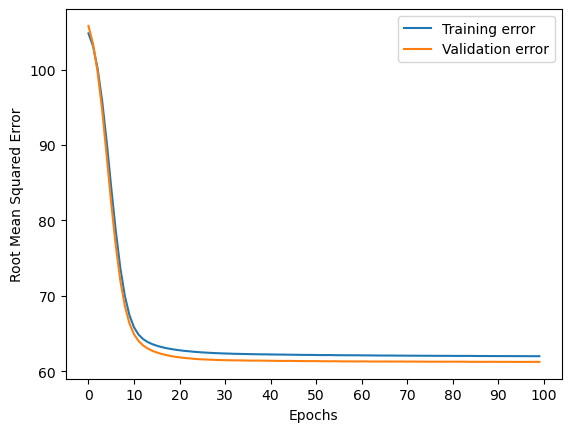

In [99]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(df_root_metrics["rmse"], label = 'Training error')
plt.plot(df_root_metrics["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

plt.xticks(np.arange(0, 100+1, 10.0))
plt.legend()

plt.show()

In [100]:
# Prediction on test set
X_test_scaled = st_scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

51/51 [==============================] - 0s 741us/step


In [101]:
# Performance
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAPE: {(mean_absolute_error(y_test, y_pred) / y_test.mean()) * 100:.2f}%")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")

MAE: 43.54
MSE: 3608.16
MAPE: 57.22%
RMSE: 60.07


## Alternative activation functions

Here we will try out the impact of three different activation functions on our model performance.

Our second model contains a `single hidden layer`, in which the `number of nodes is equal to the amount of features` we use. We also only use `one output node`, the `mean squared error loss function` and the `sigmoid activation function`. 

In [102]:
# Define sigmoid model
model_sigmoid = Sequential(
    [Dense(X_train.shape[1], activation="sigmoid", input_shape=[X_train.shape[1]]),
     Dense(1)])

In [103]:
model_sigmoid.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [104]:
model_sigmoid.summary()

Model: "sequential_1177"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3533 (Dense)          (None, 8)                 72        
                                                                 
 dense_3534 (Dense)          (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [105]:
history_sigmoid = model_sigmoid.fit(X_train_scaled, y_train.values,
                   epochs=epochs, validation_split=0.2)

Epoch 1/100
163/163 [==============================] - 1s 2ms/step - loss: 10902.1982 - mae: 73.3627 - mse: 10902.1982 - val_loss: 11146.1250 - val_mae: 75.7350 - val_mse: 11146.1250
Epoch 2/100
163/163 [==============================] - 0s 1ms/step - loss: 10707.1475 - mae: 72.3438 - mse: 10707.1475 - val_loss: 10940.0596 - val_mae: 74.6763 - val_mse: 10940.0596
Epoch 3/100
163/163 [==============================] - 0s 1ms/step - loss: 10510.8115 - mae: 71.3074 - mse: 10510.8115 - val_loss: 10738.0010 - val_mae: 73.6344 - val_mse: 10738.0010
Epoch 4/100
163/163 [==============================] - 0s 1ms/step - loss: 10320.8721 - mae: 70.2951 - mse: 10320.8721 - val_loss: 10541.8740 - val_mae: 72.6084 - val_mse: 10541.8740
Epoch 5/100
163/163 [==============================] - 0s 1ms/step - loss: 10136.9844 - mae: 69.3105 - mse: 10136.9844 - val_loss: 10351.6406 - val_mae: 71.6223 - val_mse: 10351.6406
Epoch 6/100
163/163 [==============================] - 0s 1ms/step - loss: 9953.5615 

163/163 [==============================] - 0s 1ms/step - loss: 5068.4199 - mae: 45.2836 - mse: 5068.4199 - val_loss: 5062.6074 - val_mae: 46.3890 - val_mse: 5062.6074
Epoch 47/100
163/163 [==============================] - 0s 1ms/step - loss: 5002.7114 - mae: 45.0047 - mse: 5002.7114 - val_loss: 4992.2861 - val_mae: 46.0638 - val_mse: 4992.2861
Epoch 48/100
163/163 [==============================] - 0s 1ms/step - loss: 4938.7583 - mae: 44.7094 - mse: 4938.7583 - val_loss: 4923.2905 - val_mae: 45.7650 - val_mse: 4923.2905
Epoch 49/100
163/163 [==============================] - 0s 1ms/step - loss: 4876.7500 - mae: 44.4329 - mse: 4876.7500 - val_loss: 4856.1724 - val_mae: 45.4475 - val_mse: 4856.1724
Epoch 50/100
163/163 [==============================] - 0s 1ms/step - loss: 4816.3677 - mae: 44.1830 - mse: 4816.3677 - val_loss: 4790.8442 - val_mae: 45.1516 - val_mse: 4790.8442
Epoch 51/100
163/163 [==============================] - 0s 1ms/step - loss: 4757.6528 - mae: 43.9131 - mse: 4757.

163/163 [==============================] - 0s 1ms/step - loss: 3630.2908 - mae: 40.7253 - mse: 3630.2908 - val_loss: 3464.3447 - val_mae: 40.4191 - val_mse: 3464.3447
Epoch 92/100
163/163 [==============================] - 0s 1ms/step - loss: 3619.1460 - mae: 40.7303 - mse: 3619.1460 - val_loss: 3450.3611 - val_mae: 40.3741 - val_mse: 3450.3611
Epoch 93/100
163/163 [==============================] - 0s 1ms/step - loss: 3608.1174 - mae: 40.7086 - mse: 3608.1174 - val_loss: 3437.4333 - val_mae: 40.3232 - val_mse: 3437.4333
Epoch 94/100
163/163 [==============================] - 0s 1ms/step - loss: 3597.2322 - mae: 40.6873 - mse: 3597.2322 - val_loss: 3424.1816 - val_mae: 40.2703 - val_mse: 3424.1816
Epoch 95/100
163/163 [==============================] - 0s 1ms/step - loss: 3586.4739 - mae: 40.6580 - mse: 3586.4739 - val_loss: 3411.6672 - val_mae: 40.2335 - val_mse: 3411.6672
Epoch 96/100
163/163 [==============================] - 0s 1ms/step - loss: 3575.7529 - mae: 40.6162 - mse: 3575.

In [106]:
model_sigmoid.predict(X_train_scaled[:10])

1/1 [==============================] - 0s 57ms/step


array([[ 11.69244 ],
       [ 20.78283 ],
       [109.289154],
       [ 74.25182 ],
       [ 83.94876 ],
       [109.297195],
       [ 17.059536],
       [105.80033 ],
       [ 98.675316],
       [109.26274 ]], dtype=float32)

In [107]:
sigmoid_df_history = pd.DataFrame(history_sigmoid.history)
sigmoid_df_history

,loss,mae,mse,val_loss,val_mae,val_mse
0,10902.198242,73.362717,10902.198242,11146.125000,75.735001,11146.125000
1,10707.147461,72.343811,10707.147461,10940.059570,74.676300,10940.059570
2,10510.811523,71.307358,10510.811523,10738.000977,73.634407,10738.000977
3,10320.872070,70.295082,10320.872070,10541.874023,72.608429,10541.874023
4,10136.984375,69.310524,10136.984375,10351.640625,71.622269,10351.640625
...,...,...,...,...,...,...
95,3575.752930,40.616158,3575.752930,3399.574951,40.199661,3399.574951
96,3565.079834,40.608440,3565.079834,3387.594238,40.157749,3387.594238
97,3554.268555,40.569244,3554.268555,3375.687256,40.112682,3375.687256
98,3543.257080,40.533600,3543.257080,3364.241211,40.090351,3364.241211


In [108]:
sigmoid_df_root_metrics = sigmoid_df_history[["mse", "val_mse"]].apply(np.sqrt)
sigmoid_df_root_metrics.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
sigmoid_df_root_metrics

,rmse,val_rmse
0,104.413592,105.575210
1,103.475347,104.594740
2,102.522249,103.624326
3,101.591693,102.673629
4,100.682592,101.743013
...,...,...
95,59.797600,58.305874
96,59.708289,58.203043
97,59.617687,58.100665
98,59.525264,58.002079


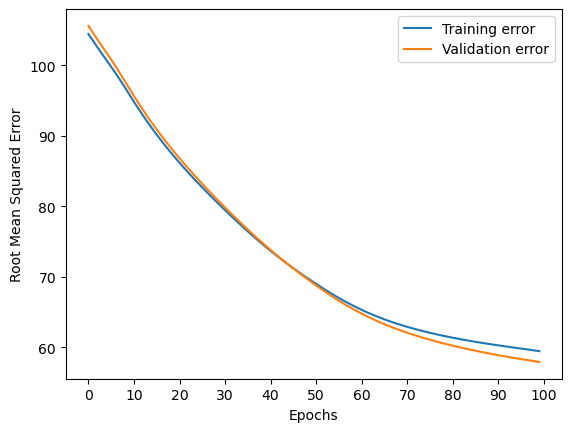

In [109]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(sigmoid_df_root_metrics["rmse"], label = 'Training error')
plt.plot(sigmoid_df_root_metrics["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

plt.xticks(np.arange(0, 100+1, 10.0))
plt.legend()

plt.show()

In [110]:
# Prediction on test set

X_test_scaled = st_scaler.transform(X_test)
y_pred = model_sigmoid.predict(X_test_scaled)

51/51 [==============================] - 0s 701us/step


In [111]:
# Report regression performance on test set
# To-Do: look at metrics again

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAPE: {(mean_absolute_error(y_test, y_pred) / y_test.mean()) * 100:.2f}%")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
# print(f"R^2: { r2_score(y_test, y_pred):.2f}")

MAE: 40.20
MSE: 3398.30
MAPE: 52.84%
RMSE: 58.29


### tanh

Our third model contains a `single hidden layer`, in which the `number of nodes is equal to the amount of features` we use. We also only use `one output node`, the `mean squared error loss function` and the `tanh activation function`. 

In [112]:
# Define hyperbolic tangent (tanh) model
model_tanh = Sequential(
    [Dense(X_train.shape[1], activation="tanh", input_shape=[X_train.shape[1]]),
     Dense(1)])

In [113]:
model_tanh.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [114]:
model_tanh.summary()

Model: "sequential_1178"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3535 (Dense)          (None, 8)                 72        
                                                                 
 dense_3536 (Dense)          (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [115]:
history_tanh = model_tanh.fit(X_train_scaled, y_train.values,
                   epochs=epochs, validation_split=0.2)

Epoch 1/100
163/163 [==============================] - 1s 2ms/step - loss: 11123.1025 - mae: 74.8121 - mse: 11123.1025 - val_loss: 11382.4580 - val_mae: 77.3842 - val_mse: 11382.4580
Epoch 2/100
163/163 [==============================] - 0s 1ms/step - loss: 10906.3965 - mae: 73.9804 - mse: 10906.3965 - val_loss: 11119.8398 - val_mae: 76.3529 - val_mse: 11119.8398
Epoch 3/100
163/163 [==============================] - 0s 1ms/step - loss: 10637.2959 - mae: 72.7907 - mse: 10637.2959 - val_loss: 10829.8311 - val_mae: 75.0104 - val_mse: 10829.8311
Epoch 4/100
163/163 [==============================] - 0s 1ms/step - loss: 10361.2451 - mae: 71.3633 - mse: 10361.2451 - val_loss: 10538.7588 - val_mae: 73.4562 - val_mse: 10538.7588
Epoch 5/100
163/163 [==============================] - 0s 1ms/step - loss: 10081.4629 - mae: 69.7361 - mse: 10081.4629 - val_loss: 10246.2549 - val_mae: 71.7609 - val_mse: 10246.2549
Epoch 6/100
163/163 [==============================] - 0s 1ms/step - loss: 9812.2568 

163/163 [==============================] - 0s 1ms/step - loss: 5051.9409 - mae: 44.1438 - mse: 5051.9409 - val_loss: 5068.8149 - val_mae: 45.2883 - val_mse: 5068.8149
Epoch 47/100
163/163 [==============================] - 0s 1ms/step - loss: 4982.7891 - mae: 43.7748 - mse: 4982.7891 - val_loss: 4995.9404 - val_mae: 44.9135 - val_mse: 4995.9404
Epoch 48/100
163/163 [==============================] - 0s 1ms/step - loss: 4915.8452 - mae: 43.4654 - mse: 4915.8452 - val_loss: 4925.1895 - val_mae: 44.5229 - val_mse: 4925.1895
Epoch 49/100
163/163 [==============================] - 0s 1ms/step - loss: 4850.8823 - mae: 43.1382 - mse: 4850.8823 - val_loss: 4855.6875 - val_mae: 44.1656 - val_mse: 4855.6875
Epoch 50/100
163/163 [==============================] - 0s 1ms/step - loss: 4786.9512 - mae: 42.8138 - mse: 4786.9512 - val_loss: 4787.0371 - val_mae: 43.7697 - val_mse: 4787.0371
Epoch 51/100
163/163 [==============================] - 0s 1ms/step - loss: 4722.7881 - mae: 42.4527 - mse: 4722.

163/163 [==============================] - 0s 1ms/step - loss: 3015.4519 - mae: 33.8018 - mse: 3015.4519 - val_loss: 2967.5503 - val_mae: 33.9141 - val_mse: 2967.5503
Epoch 92/100
163/163 [==============================] - 0s 1ms/step - loss: 2991.2966 - mae: 33.7405 - mse: 2991.2966 - val_loss: 2944.7358 - val_mae: 33.7901 - val_mse: 2944.7358
Epoch 93/100
163/163 [==============================] - 0s 1ms/step - loss: 2968.0896 - mae: 33.6220 - mse: 2968.0896 - val_loss: 2922.8440 - val_mae: 33.6609 - val_mse: 2922.8440
Epoch 94/100
163/163 [==============================] - 0s 1ms/step - loss: 2945.3413 - mae: 33.4878 - mse: 2945.3413 - val_loss: 2902.7449 - val_mae: 33.5892 - val_mse: 2902.7449
Epoch 95/100
163/163 [==============================] - 0s 1ms/step - loss: 2923.9956 - mae: 33.4282 - mse: 2923.9956 - val_loss: 2882.7229 - val_mae: 33.4769 - val_mse: 2882.7229
Epoch 96/100
163/163 [==============================] - 0s 1ms/step - loss: 2903.3030 - mae: 33.3387 - mse: 2903.

In [116]:
model_tanh.predict(X_train_scaled[:10])

1/1 [==============================] - 0s 52ms/step


array([[ -9.157217],
       [ 33.683434],
       [121.55619 ],
       [ 68.49776 ],
       [ 57.310402],
       [119.703636],
       [ 14.904994],
       [121.507416],
       [111.281   ],
       [118.54966 ]], dtype=float32)

In [117]:
tanh_df_history = pd.DataFrame(history_tanh.history)
tanh_df_history

,loss,mae,mse,val_loss,val_mae,val_mse
0,11123.102539,74.812119,11123.102539,11382.458008,77.384163,11382.458008
1,10906.396484,73.980385,10906.396484,11119.839844,76.352882,11119.839844
2,10637.295898,72.790680,10637.295898,10829.831055,75.010406,10829.831055
3,10361.245117,71.363335,10361.245117,10538.758789,73.456169,10538.758789
4,10081.462891,69.736099,10081.462891,10246.254883,71.760933,10246.254883
...,...,...,...,...,...,...
95,2903.302979,33.338737,2903.302979,2863.236816,33.385777,2863.236816
96,2883.589600,33.241787,2883.589600,2844.417725,33.287624,2844.417725
97,2864.751953,33.195755,2864.751953,2827.010986,33.213459,2827.010986
98,2846.609619,33.073547,2846.609619,2810.474121,33.177952,2810.474121


In [118]:
tanh_df_root_metrics = tanh_df_history[["mse", "val_mse"]].apply(np.sqrt)
tanh_df_root_metrics.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
tanh_df_root_metrics

,rmse,val_rmse
0,105.466120,106.688603
1,104.433694,105.450651
2,103.137267,104.066474
3,101.790201,102.658457
4,100.406488,101.223786
...,...,...
95,53.882307,53.509222
96,53.699065,53.333083
97,53.523378,53.169643
98,53.353628,53.013905


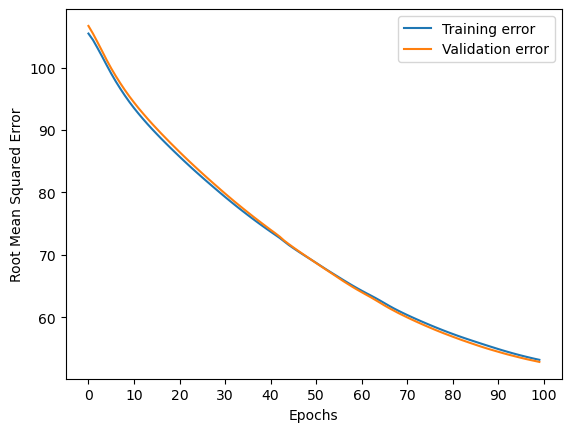

In [119]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(tanh_df_root_metrics["rmse"], label = 'Training error')
plt.plot(tanh_df_root_metrics["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

plt.xticks(np.arange(0, 100+1, 10.0))
plt.legend()

plt.show()

In [120]:
# Prediction on test set

X_test_scaled = st_scaler.transform(X_test)
y_pred = model_tanh.predict(X_test_scaled)

51/51 [==============================] - 0s 701us/step


In [121]:
# Report regression performance on test set

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAPE: {(mean_absolute_error(y_test, y_pred) / y_test.mean()) * 100:.2f}%")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")

MAE: 33.10
MSE: 2694.51
MAPE: 43.51%
RMSE: 51.91


Seeing the performance of our baseline model with the relu activation function vs. sigmoid and hyperbolic tangent activation functions, we determined that the sigmoid activation function does not perform well enough for our purposes. 

While the hyperbolic tangent activation function performs slightly better against the relu activation function in this instance, we learnt about the vanishing gradient problem while working on the project. Therefore, we decided to keep considering both activation functions later on in our grid search.

## Number of hidden layers

Now we want to try and see the impact on performance when we change the number of hidden layers we use in our neural network. 

Our fourth model contains a `3 hidden layers`, in which the `number of nodes is equal to the amount of features` we use. We also only use `one output node`, the `mean squared error loss function` and the `relu activation function`. 

In [122]:
# Define model with more hidden layers
model_mlayers = Sequential(
    [Dense(X_train.shape[1], activation="relu", input_shape=[X_train.shape[1]]),
     Dense(X_train.shape[1], activation="relu"),
     Dense(X_train.shape[1], activation="relu"),
     Dense(1)])

In [123]:
model_mlayers.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [124]:
model_mlayers.summary()

Model: "sequential_1179"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3537 (Dense)          (None, 8)                 72        
                                                                 
 dense_3538 (Dense)          (None, 8)                 72        
                                                                 
 dense_3539 (Dense)          (None, 8)                 72        
                                                                 
 dense_3540 (Dense)          (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [125]:
history_mlayers = model_mlayers.fit(X_train_scaled, y_train.values,
                   epochs=epochs, validation_split=0.2)

Epoch 1/100
163/163 [==============================] - 1s 3ms/step - loss: 11118.9785 - mae: 74.7050 - mse: 11118.9785 - val_loss: 11243.1816 - val_mae: 76.1105 - val_mse: 11243.1826
Epoch 2/100
163/163 [==============================] - 0s 1ms/step - loss: 9536.6211 - mae: 66.4768 - mse: 9536.6211 - val_loss: 7074.3823 - val_mae: 56.6265 - val_mse: 7074.3823
Epoch 3/100
163/163 [==============================] - 0s 1ms/step - loss: 4786.2271 - mae: 48.0749 - mse: 4786.2271 - val_loss: 4120.7173 - val_mae: 46.8753 - val_mse: 4120.7173
Epoch 4/100
163/163 [==============================] - 0s 1ms/step - loss: 4066.0134 - mae: 46.5862 - mse: 4066.0134 - val_loss: 3980.3354 - val_mae: 46.4148 - val_mse: 3980.3354
Epoch 5/100
163/163 [==============================] - 0s 2ms/step - loss: 3994.0901 - mae: 46.1968 - mse: 3994.0901 - val_loss: 3928.8938 - val_mae: 46.1926 - val_mse: 3928.8938
Epoch 6/100
163/163 [==============================] - 0s 1ms/step - loss: 3960.9182 - mae: 46.1026 -

163/163 [==============================] - 0s 1ms/step - loss: 2275.9780 - mae: 31.3178 - mse: 2275.9780 - val_loss: 2124.0852 - val_mae: 30.4444 - val_mse: 2124.0852
Epoch 47/100
163/163 [==============================] - 0s 1ms/step - loss: 2267.9260 - mae: 31.0944 - mse: 2267.9260 - val_loss: 2111.5488 - val_mae: 30.4855 - val_mse: 2111.5488
Epoch 48/100
163/163 [==============================] - 0s 1ms/step - loss: 2260.9312 - mae: 31.0422 - mse: 2260.9312 - val_loss: 2118.0366 - val_mae: 30.1951 - val_mse: 2118.0366
Epoch 49/100
163/163 [==============================] - 0s 1ms/step - loss: 2256.3396 - mae: 31.0472 - mse: 2256.3396 - val_loss: 2097.6763 - val_mae: 30.1965 - val_mse: 2097.6763
Epoch 50/100
163/163 [==============================] - 0s 1ms/step - loss: 2248.4285 - mae: 30.8989 - mse: 2248.4285 - val_loss: 2098.9417 - val_mae: 30.0570 - val_mse: 2098.9417
Epoch 51/100
163/163 [==============================] - 0s 1ms/step - loss: 2247.7742 - mae: 30.7615 - mse: 2247.

163/163 [==============================] - 0s 1ms/step - loss: 2151.3074 - mae: 29.5617 - mse: 2151.3074 - val_loss: 2008.2557 - val_mae: 28.9869 - val_mse: 2008.2557
Epoch 92/100
163/163 [==============================] - 0s 1ms/step - loss: 2148.7549 - mae: 29.6062 - mse: 2148.7549 - val_loss: 2004.0802 - val_mae: 28.8062 - val_mse: 2004.0802
Epoch 93/100
163/163 [==============================] - 0s 1ms/step - loss: 2147.1963 - mae: 29.4182 - mse: 2147.1963 - val_loss: 2005.4803 - val_mae: 29.1561 - val_mse: 2005.4803
Epoch 94/100
163/163 [==============================] - 0s 1ms/step - loss: 2146.5461 - mae: 29.5014 - mse: 2146.5461 - val_loss: 2006.2249 - val_mae: 29.0450 - val_mse: 2006.2249
Epoch 95/100
163/163 [==============================] - 0s 1ms/step - loss: 2143.8123 - mae: 29.4369 - mse: 2143.8123 - val_loss: 2005.3015 - val_mae: 29.0629 - val_mse: 2005.3015
Epoch 96/100
163/163 [==============================] - 0s 1ms/step - loss: 2142.6162 - mae: 29.4626 - mse: 2142.

In [126]:
model_mlayers.predict(X_train_scaled[:10])

1/1 [==============================] - 0s 67ms/step


array([[  1.6075132],
       [ 17.830578 ],
       [172.54756  ],
       [ 82.73488  ],
       [ 47.434284 ],
       [139.89926  ],
       [  9.280493 ],
       [150.49506  ],
       [150.2188   ],
       [128.19298  ]], dtype=float32)

In [127]:
mlayers_df_history = pd.DataFrame(history_mlayers.history)
mlayers_df_history

,loss,mae,mse,val_loss,val_mae,val_mse
0,11118.978516,74.705048,11118.978516,11243.181641,76.110535,11243.182617
1,9536.621094,66.476799,9536.621094,7074.382324,56.626514,7074.382324
2,4786.227051,48.074917,4786.227051,4120.717285,46.875301,4120.717285
3,4066.013428,46.586193,4066.013428,3980.335449,46.414845,3980.335449
4,3994.090088,46.196789,3994.090088,3928.893799,46.192604,3928.893799
...,...,...,...,...,...,...
95,2142.616211,29.462568,2142.616211,2004.190796,29.054129,2004.190796
96,2149.104248,29.388573,2149.104248,2008.087891,29.237930,2008.087891
97,2142.076660,29.548552,2142.076660,2015.370239,28.624363,2015.370239
98,2141.889404,29.353857,2141.889404,1998.951294,28.795366,1998.951294


In [128]:
mlayers_df_root_metrics = mlayers_df_history[["mse", "val_mse"]].apply(np.sqrt)
mlayers_df_root_metrics.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
mlayers_df_root_metrics

,rmse,val_rmse
0,105.446567,106.033875
1,97.655625,84.109347
2,69.182563,64.192813
3,63.765300,63.089900
4,63.198814,62.680889
...,...,...
95,46.288403,44.768190
96,46.358432,44.811694
97,46.282574,44.892875
98,46.280551,44.709633


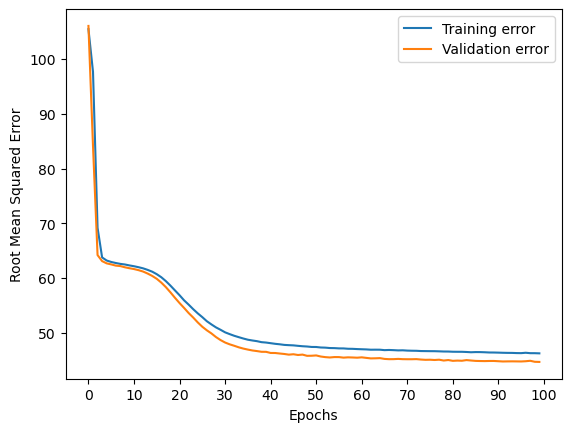

In [129]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(mlayers_df_root_metrics["rmse"], label = 'Training error')
plt.plot(mlayers_df_root_metrics["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

plt.xticks(np.arange(0, 100+1, 10.0))
plt.legend()

plt.show()

In [130]:
# Prediction on test set

X_test_scaled = st_scaler.transform(X_test)
y_pred = model_mlayers.predict(X_test_scaled)

51/51 [==============================] - 0s 781us/step


In [131]:
# Report regression performance on test set

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAPE: {(mean_absolute_error(y_test, y_pred) / y_test.mean()) * 100:.2f}%")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")

MAE: 30.15
MSE: 2091.80
MAPE: 39.62%
RMSE: 45.74


## More nodes

Now we want to try and see the impact on performance when we change the number of nodes within the hidden layer.

Our fifth model contains a `single hidden layers`, in which the `number of nodes =(number of features)*2` we use. We also only use `one output node`, the `mean squared error loss function` and the `relu activation function`. 

In [132]:
# Define model with more nodes in hidden layer
model_mnodes = Sequential(
    [Dense(X_train.shape[1]*2, activation="relu", input_shape=[X_train.shape[1]]),
     Dense(1)])

In [133]:
model_mnodes.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [134]:
model_mnodes.summary()

Model: "sequential_1180"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3541 (Dense)          (None, 16)                144       
                                                                 
 dense_3542 (Dense)          (None, 1)                 17        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [135]:
history_mnodes = model_mnodes.fit(X_train_scaled, y_train.values,
                   epochs=epochs, validation_split=0.2)

Epoch 1/100
163/163 [==============================] - 2s 8ms/step - loss: 11132.6650 - mae: 74.7309 - mse: 11132.6650 - val_loss: 11343.5020 - val_mae: 76.8005 - val_mse: 11343.5020
Epoch 2/100
163/163 [==============================] - 0s 1ms/step - loss: 10792.2959 - mae: 72.8019 - mse: 10792.2959 - val_loss: 10898.7881 - val_mae: 74.5213 - val_mse: 10898.7881
Epoch 3/100
163/163 [==============================] - 0s 1ms/step - loss: 10231.2598 - mae: 69.8930 - mse: 10231.2598 - val_loss: 10163.3301 - val_mae: 71.0087 - val_mse: 10163.3301
Epoch 4/100
163/163 [==============================] - 0s 1ms/step - loss: 9373.4404 - mae: 65.7927 - mse: 9373.4404 - val_loss: 9146.7041 - val_mae: 66.2283 - val_mse: 9146.7041
Epoch 5/100
163/163 [==============================] - 0s 1ms/step - loss: 8330.5947 - mae: 60.8956 - mse: 8330.5947 - val_loss: 8027.8584 - val_mae: 61.0632 - val_mse: 8027.8584
Epoch 6/100
163/163 [==============================] - 0s 1ms/step - loss: 7275.8701 - mae: 5

163/163 [==============================] - 0s 1ms/step - loss: 2867.5803 - mae: 37.4595 - mse: 2867.5803 - val_loss: 2794.6936 - val_mae: 37.0363 - val_mse: 2794.6936
Epoch 47/100
163/163 [==============================] - 0s 1ms/step - loss: 2855.0007 - mae: 37.4377 - mse: 2855.0007 - val_loss: 2784.4146 - val_mae: 36.8923 - val_mse: 2784.4146
Epoch 48/100
163/163 [==============================] - 0s 1ms/step - loss: 2843.7954 - mae: 37.4205 - mse: 2843.7954 - val_loss: 2773.4526 - val_mae: 36.8426 - val_mse: 2773.4526
Epoch 49/100
163/163 [==============================] - 0s 1ms/step - loss: 2833.3328 - mae: 37.2301 - mse: 2833.3328 - val_loss: 2763.2896 - val_mae: 36.7771 - val_mse: 2763.2896
Epoch 50/100
163/163 [==============================] - 0s 1ms/step - loss: 2822.8743 - mae: 37.1794 - mse: 2822.8743 - val_loss: 2752.8574 - val_mae: 36.7637 - val_mse: 2752.8574
Epoch 51/100
163/163 [==============================] - 0s 1ms/step - loss: 2813.7007 - mae: 37.1650 - mse: 2813.

163/163 [==============================] - 0s 1ms/step - loss: 2491.8054 - mae: 34.4890 - mse: 2491.8054 - val_loss: 2430.6553 - val_mae: 34.0809 - val_mse: 2430.6553
Epoch 92/100
163/163 [==============================] - 0s 1ms/step - loss: 2484.9443 - mae: 34.4219 - mse: 2484.9443 - val_loss: 2425.4080 - val_mae: 34.1062 - val_mse: 2425.4080
Epoch 93/100
163/163 [==============================] - 0s 1ms/step - loss: 2478.7095 - mae: 34.4986 - mse: 2478.7095 - val_loss: 2419.1770 - val_mae: 33.9812 - val_mse: 2419.1770
Epoch 94/100
163/163 [==============================] - 0s 1ms/step - loss: 2472.4001 - mae: 34.4228 - mse: 2472.4001 - val_loss: 2412.6885 - val_mae: 33.9130 - val_mse: 2412.6885
Epoch 95/100
163/163 [==============================] - 0s 1ms/step - loss: 2465.8308 - mae: 34.3490 - mse: 2465.8308 - val_loss: 2407.1321 - val_mae: 33.8474 - val_mse: 2407.1321
Epoch 96/100
163/163 [==============================] - 0s 1ms/step - loss: 2459.4424 - mae: 34.2784 - mse: 2459.

In [136]:
model_mnodes.predict(X_train_scaled[:10])

1/1 [==============================] - 0s 51ms/step


array([[  1.2469842],
       [ 11.696711 ],
       [183.34743  ],
       [ 96.45028  ],
       [ 59.74899  ],
       [148.30316  ],
       [  5.9184303],
       [112.08208  ],
       [ 93.03855  ],
       [140.07098  ]], dtype=float32)

In [137]:
mnodes_df_history = pd.DataFrame(history_mnodes.history)
mnodes_df_history

,loss,mae,mse,val_loss,val_mae,val_mse
0,11132.665039,74.730865,11132.665039,11343.501953,76.800507,11343.501953
1,10792.295898,72.801903,10792.295898,10898.788086,74.521332,10898.788086
2,10231.259766,69.893005,10231.259766,10163.330078,71.008720,10163.330078
3,9373.440430,65.792740,9373.440430,9146.704102,66.228302,9146.704102
4,8330.594727,60.895576,8330.594727,8027.858398,61.063179,8027.858398
...,...,...,...,...,...,...
95,2459.442383,34.278435,2459.442383,2401.263672,33.820320,2401.263672
96,2453.947510,34.168007,2453.947510,2395.051025,33.782848,2395.051025
97,2447.016113,34.270115,2447.016113,2388.484863,33.673100,2388.484863
98,2441.571533,34.105083,2441.571533,2382.220947,33.673847,2382.220947


In [138]:
mnodes_df_root_metrics = mnodes_df_history[["mse", "val_mse"]].apply(np.sqrt)
mnodes_df_root_metrics.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
mnodes_df_root_metrics

,rmse,val_rmse
0,105.511445,106.505878
1,103.885975,104.397261
2,101.149690,100.813343
3,96.816530,95.638403
4,91.272092,89.598317
...,...,...
95,49.592765,49.002690
96,49.537335,48.939259
97,49.467324,48.872128
98,49.412261,48.808001


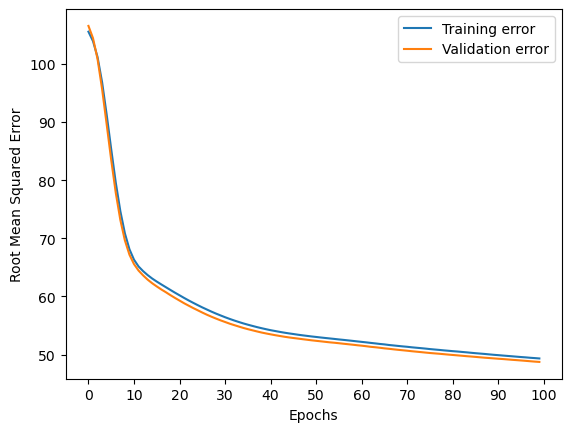

In [139]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(mnodes_df_root_metrics["rmse"], label = 'Training error')
plt.plot(mnodes_df_root_metrics["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

plt.xticks(np.arange(0, 100+1, 10.0))
plt.legend()

plt.show()

In [140]:
# Prediction on test set

X_test_scaled = st_scaler.transform(X_test)
y_pred = model_mnodes.predict(X_test_scaled)

51/51 [==============================] - 0s 711us/step


In [141]:
# Report regression performance on test set

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAPE: {(mean_absolute_error(y_test, y_pred) / y_test.mean()) * 100:.2f}%")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")

MAE: 33.93
MSE: 2274.14
MAPE: 44.60%
RMSE: 47.69


In both instances that we looked at, the adjusting of the number of hidden layers and number of nodes within the hidden layers positively impacted the performance of the model. 

However, one should be aware that due to the stochastical nature of neural networks, the performance measures can be different each time the models are trained.

## Gridsearch for optimal hyperparameters

Now we want to perform a [grid search](https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/) on our three chosen hyperparameters: `number of hidden layers`, `number of nodes in hidden layers`, and `activation functions`. We do this because we want to find the best combination of hyperparameters for our model performance.

In [142]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

# Create gridsearch model function because we had issues running the grid search when manually creating the model
def gs_model_create( n_nodes, n_hidden_layers, activation, loss='mse'):
    gs_model= Sequential()
    gs_model.add(Dense(n_nodes, activation=activation, input_shape=[X_train.shape[1]]))
    
    #add hidden layers if given parameter
    for _ in range(n_hidden_layers - 1):
        model.add(Dense(n_nodes, activation=activation))
    
    gs_model.add(Dense(1))
    gs_model.compile(loss=loss)
    return gs_model

In [143]:
#create parameter grid
parameters = { 
    'activation': ['relu', 'tanh'],
    'n_hidden_layers': [1, 2, 4, 8],
    'n_nodes': [1, X_train.shape[1], X_train.shape[1] * 2, X_train.shape[1] * 4]
    }

# grid search without taking average below (faster but best_parameter result changes often when running)
# grid_searchNEW = GridSearchCV(estimator = KerasRegressor(gs_model_create),
#                            param_grid = parameters,
#                            cv = 3)

We decided to take the average of the result of the gridsearch because the best parameters changed multiple times. 

In [144]:
# number of runs
n_runs = 5

# list to store the results of the runs
results = []

# run the grid search multiple times
for i in range(n_runs):
    grid_searchNEW = GridSearchCV(estimator = KerasRegressor(gs_model_create),
                           param_grid = parameters, return_train_score=True, 
                           cv = 3)
    grid_searchNEW.fit(X_train, y_train, verbose=1)
    results.append(grid_searchNEW.cv_results_)

68/68 [==============================] - 0s 777us/step - loss: 10920.9580


136/136 [==============================] - 0s 764us/step - loss: 11383.2754


136/136 [==============================] - 0s 756us/step - loss: 11385.9561


136/136 [==============================] - 0s 853us/step - loss: 11155.4150


136/136 [==============================] - 0s 845us/step - loss: 10999.8389


136/136 [==============================] - 0s 853us/step - loss: 11332.0957


68/68 [==============================] - 0s 762us/step - loss: 11405.9180


136/136 [==============================] - 0s 842us/step - loss: 9051.1533


68/68 [==============================] - 0s 762us/step - loss: 11340.0254


136/136 [==============================] - 0s 808us/step - loss: 11136.2168


136/136 [==============================] - 0s 786us/step - loss: 11180.0244


136/136 [==============================] - 1s 853us/step - loss: 11181.2139


136/136 [==============================] - 1s 845us/step - loss: 11150.7812


204/204 [==============================] - 1s 863us/step - loss: 5919.6362


In [145]:
# average the results
average_scores = {}
for score in ['mean_test_score', 'mean_train_score', 'std_test_score', 'std_train_score']:
    average_scores[score] = np.mean([result[score] for result in results], axis=0)

In [146]:
# best parameters and best score
best_params = results[0]['params'][np.argmax(average_scores['mean_test_score'])]
best_score = np.max(average_scores['mean_test_score'])
print("Best parameters: ", best_params)

Best parameters:  {'activation': 'relu', 'n_hidden_layers': 1, 'n_nodes': 32}


Through the grid-search we found that `relu, 4, 32` is the best combination of hyperparameters for performance. 

Again, be aware that the results of the gridsearch for neural networks is random because of gradient descent. The "best" combination of hyperparameters can change each run. We tried to stabilize the best parameter result by averaging it.

Now we will use the combination of hyperparameters above to retrain our NN with a larger number of epochs to see the impact on performance.

Our sixth model contains a `four hidden layers`, in which the `number of nodes =(number of features)*4` we use. We also only use `one output node`, the `mean squared error loss function` and the `relu activation function`. We use `epochs=500`.

In [147]:
large_epoch_model = Sequential(
    [Dense(X_train.shape[1]*4, activation="relu", input_shape=[X_train.shape[1]]),
     Dense(X_train.shape[1]*4, activation="relu"),
     Dense(X_train.shape[1]*4, activation="relu"),
     Dense(X_train.shape[1]*4, activation="relu"),
     Dense(1)])

In [148]:
large_epoch_model.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [149]:
large_epoch_model.summary()

Model: "sequential_1666"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5842 (Dense)          (None, 32)                288       
                                                                 
 dense_5843 (Dense)          (None, 32)                1056      
                                                                 
 dense_5844 (Dense)          (None, 32)                1056      
                                                                 
 dense_5845 (Dense)          (None, 32)                1056      
                                                                 
 dense_5846 (Dense)          (None, 1)                 33        
                                                                 
Total params: 3,489
Trainable params: 3,489
Non-trainable params: 0
_________________________________________________________________


In [150]:
#we use epochs=500
history_large_epoch_model = large_epoch_model.fit(X_train_scaled, y_train.values,
                   epochs=500, validation_split=0.2)

Epoch 1/500
163/163 [==============================] - 1s 3ms/step - loss: 7711.6274 - mae: 61.4623 - mse: 7711.6274 - val_loss: 4101.9814 - val_mae: 47.2833 - val_mse: 4101.9814
Epoch 2/500
163/163 [==============================] - 0s 2ms/step - loss: 3984.1157 - mae: 45.7088 - mse: 3984.1157 - val_loss: 3751.0349 - val_mae: 44.8576 - val_mse: 3751.0349
Epoch 3/500
163/163 [==============================] - 0s 2ms/step - loss: 3642.8228 - mae: 42.9603 - mse: 3642.8228 - val_loss: 3351.5012 - val_mae: 42.1150 - val_mse: 3351.5012
Epoch 4/500
163/163 [==============================] - 0s 2ms/step - loss: 3021.8972 - mae: 37.7117 - mse: 3021.8972 - val_loss: 2583.8989 - val_mae: 34.2277 - val_mse: 2583.8989
Epoch 5/500
163/163 [==============================] - 0s 2ms/step - loss: 2481.2461 - mae: 33.2212 - mse: 2481.2461 - val_loss: 2249.3740 - val_mae: 31.6522 - val_mse: 2249.3740
Epoch 6/500
163/163 [==============================] - 0s 2ms/step - loss: 2219.3811 - mae: 30.7960 - mse

Epoch 47/500
163/163 [==============================] - 0s 2ms/step - loss: 727.4708 - mae: 16.6160 - mse: 727.4708 - val_loss: 752.9958 - val_mae: 17.1705 - val_mse: 752.9958
Epoch 48/500
163/163 [==============================] - 0s 2ms/step - loss: 710.9974 - mae: 16.4120 - mse: 710.9974 - val_loss: 781.1168 - val_mae: 17.1893 - val_mse: 781.1168
Epoch 49/500
163/163 [==============================] - 0s 2ms/step - loss: 721.9489 - mae: 16.5687 - mse: 721.9489 - val_loss: 760.3561 - val_mae: 17.1797 - val_mse: 760.3561
Epoch 50/500
163/163 [==============================] - 0s 2ms/step - loss: 694.1440 - mae: 16.2657 - mse: 694.1440 - val_loss: 846.8019 - val_mae: 17.9976 - val_mse: 846.8019
Epoch 51/500
163/163 [==============================] - 0s 2ms/step - loss: 709.6458 - mae: 16.5304 - mse: 709.6458 - val_loss: 888.5535 - val_mae: 18.5569 - val_mse: 888.5535
Epoch 52/500
163/163 [==============================] - 0s 2ms/step - loss: 700.6257 - mae: 16.4321 - mse: 700.6257 - va

163/163 [==============================] - 0s 2ms/step - loss: 619.4739 - mae: 15.1996 - mse: 619.4739 - val_loss: 710.4360 - val_mae: 16.3252 - val_mse: 710.4360
Epoch 94/500
163/163 [==============================] - 0s 2ms/step - loss: 620.5182 - mae: 15.0703 - mse: 620.5182 - val_loss: 723.8697 - val_mae: 16.1538 - val_mse: 723.8697
Epoch 95/500
163/163 [==============================] - 0s 2ms/step - loss: 627.3321 - mae: 15.3114 - mse: 627.3321 - val_loss: 721.0789 - val_mae: 16.3313 - val_mse: 721.0789
Epoch 96/500
163/163 [==============================] - 0s 2ms/step - loss: 612.5645 - mae: 15.0127 - mse: 612.5645 - val_loss: 708.7619 - val_mae: 16.0869 - val_mse: 708.7619
Epoch 97/500
163/163 [==============================] - 0s 2ms/step - loss: 626.8059 - mae: 15.1992 - mse: 626.8059 - val_loss: 740.0818 - val_mae: 16.5591 - val_mse: 740.0818
Epoch 98/500
163/163 [==============================] - 0s 2ms/step - loss: 612.6584 - mae: 15.0998 - mse: 612.6584 - val_loss: 803.7

163/163 [==============================] - 0s 2ms/step - loss: 585.1387 - mae: 14.7911 - mse: 585.1387 - val_loss: 724.3434 - val_mae: 16.5472 - val_mse: 724.3434
Epoch 140/500
163/163 [==============================] - 0s 2ms/step - loss: 602.6558 - mae: 14.9621 - mse: 602.6558 - val_loss: 696.8290 - val_mae: 16.0548 - val_mse: 696.8290
Epoch 141/500
163/163 [==============================] - 0s 2ms/step - loss: 587.9511 - mae: 14.7406 - mse: 587.9511 - val_loss: 711.4238 - val_mae: 16.2003 - val_mse: 711.4238
Epoch 142/500
163/163 [==============================] - 0s 2ms/step - loss: 586.5595 - mae: 14.7843 - mse: 586.5595 - val_loss: 725.0350 - val_mae: 16.5636 - val_mse: 725.0350
Epoch 143/500
163/163 [==============================] - 0s 2ms/step - loss: 588.0520 - mae: 14.7371 - mse: 588.0520 - val_loss: 705.7998 - val_mae: 15.8307 - val_mse: 705.7998
Epoch 144/500
163/163 [==============================] - 0s 2ms/step - loss: 606.5511 - mae: 14.9038 - mse: 606.5511 - val_loss: 

163/163 [==============================] - 0s 2ms/step - loss: 571.8231 - mae: 14.4247 - mse: 571.8231 - val_loss: 712.4512 - val_mae: 16.0381 - val_mse: 712.4512
Epoch 186/500
163/163 [==============================] - 0s 2ms/step - loss: 555.4455 - mae: 14.3892 - mse: 555.4455 - val_loss: 718.0402 - val_mae: 16.4193 - val_mse: 718.0402
Epoch 187/500
163/163 [==============================] - 0s 2ms/step - loss: 570.3448 - mae: 14.4436 - mse: 570.3448 - val_loss: 730.3110 - val_mae: 16.2638 - val_mse: 730.3110
Epoch 188/500
163/163 [==============================] - 0s 2ms/step - loss: 571.4291 - mae: 14.5305 - mse: 571.4291 - val_loss: 778.9794 - val_mae: 16.7220 - val_mse: 778.9794
Epoch 189/500
163/163 [==============================] - 0s 2ms/step - loss: 555.4315 - mae: 14.2231 - mse: 555.4315 - val_loss: 779.3428 - val_mae: 17.4993 - val_mse: 779.3428
Epoch 190/500
163/163 [==============================] - 0s 2ms/step - loss: 572.8898 - mae: 14.6782 - mse: 572.8898 - val_loss: 

163/163 [==============================] - 0s 2ms/step - loss: 550.3641 - mae: 14.3916 - mse: 550.3641 - val_loss: 713.4057 - val_mae: 16.1783 - val_mse: 713.4057
Epoch 232/500
163/163 [==============================] - 0s 2ms/step - loss: 543.3752 - mae: 14.0783 - mse: 543.3752 - val_loss: 725.8215 - val_mae: 16.4575 - val_mse: 725.8215
Epoch 233/500
163/163 [==============================] - 0s 2ms/step - loss: 560.3550 - mae: 14.6280 - mse: 560.3550 - val_loss: 707.2620 - val_mae: 15.9138 - val_mse: 707.2620
Epoch 234/500
163/163 [==============================] - 0s 2ms/step - loss: 552.6912 - mae: 14.2847 - mse: 552.6912 - val_loss: 737.3878 - val_mae: 16.5045 - val_mse: 737.3878
Epoch 235/500
163/163 [==============================] - 0s 2ms/step - loss: 557.7925 - mae: 14.2560 - mse: 557.7925 - val_loss: 733.3020 - val_mae: 16.7402 - val_mse: 733.3020
Epoch 236/500
163/163 [==============================] - 0s 2ms/step - loss: 555.3013 - mae: 14.1606 - mse: 555.3013 - val_loss: 

163/163 [==============================] - 0s 2ms/step - loss: 546.8757 - mae: 14.0935 - mse: 546.8757 - val_loss: 745.8751 - val_mae: 16.5935 - val_mse: 745.8751
Epoch 278/500
163/163 [==============================] - 0s 2ms/step - loss: 540.8632 - mae: 14.1381 - mse: 540.8632 - val_loss: 756.1780 - val_mae: 16.8872 - val_mse: 756.1780
Epoch 279/500
163/163 [==============================] - 0s 2ms/step - loss: 549.9403 - mae: 14.2162 - mse: 549.9403 - val_loss: 710.2725 - val_mae: 16.1809 - val_mse: 710.2725
Epoch 280/500
163/163 [==============================] - 0s 2ms/step - loss: 531.2456 - mae: 13.9846 - mse: 531.2456 - val_loss: 759.1624 - val_mae: 16.9106 - val_mse: 759.1624
Epoch 281/500
163/163 [==============================] - 0s 2ms/step - loss: 535.3160 - mae: 13.9768 - mse: 535.3160 - val_loss: 734.1135 - val_mae: 16.5251 - val_mse: 734.1135
Epoch 282/500
163/163 [==============================] - 0s 2ms/step - loss: 532.6417 - mae: 13.9965 - mse: 532.6417 - val_loss: 

163/163 [==============================] - 0s 2ms/step - loss: 518.2913 - mae: 13.7811 - mse: 518.2913 - val_loss: 710.6807 - val_mae: 16.1768 - val_mse: 710.6807
Epoch 324/500
163/163 [==============================] - 0s 2ms/step - loss: 536.9996 - mae: 13.9433 - mse: 536.9996 - val_loss: 720.7808 - val_mae: 16.2737 - val_mse: 720.7808
Epoch 325/500
163/163 [==============================] - 0s 2ms/step - loss: 510.8481 - mae: 13.6995 - mse: 510.8481 - val_loss: 732.6564 - val_mae: 16.2394 - val_mse: 732.6564
Epoch 326/500
163/163 [==============================] - 0s 2ms/step - loss: 522.0164 - mae: 13.8763 - mse: 522.0164 - val_loss: 722.8711 - val_mae: 16.1169 - val_mse: 722.8711
Epoch 327/500
163/163 [==============================] - 0s 2ms/step - loss: 518.2991 - mae: 13.6090 - mse: 518.2991 - val_loss: 726.0735 - val_mae: 16.0350 - val_mse: 726.0735
Epoch 328/500
163/163 [==============================] - 0s 2ms/step - loss: 524.4626 - mae: 13.8202 - mse: 524.4626 - val_loss: 

163/163 [==============================] - 0s 2ms/step - loss: 507.2724 - mae: 13.7194 - mse: 507.2724 - val_loss: 757.6958 - val_mae: 16.4237 - val_mse: 757.6958
Epoch 370/500
163/163 [==============================] - 0s 2ms/step - loss: 512.8678 - mae: 13.7122 - mse: 512.8678 - val_loss: 725.1340 - val_mae: 16.3729 - val_mse: 725.1340
Epoch 371/500
163/163 [==============================] - 0s 2ms/step - loss: 511.6898 - mae: 13.6610 - mse: 511.6898 - val_loss: 710.0123 - val_mae: 16.2743 - val_mse: 710.0123
Epoch 372/500
163/163 [==============================] - 0s 2ms/step - loss: 509.4103 - mae: 13.5556 - mse: 509.4103 - val_loss: 718.4415 - val_mae: 16.1463 - val_mse: 718.4415
Epoch 373/500
163/163 [==============================] - 0s 2ms/step - loss: 515.4913 - mae: 13.7503 - mse: 515.4913 - val_loss: 719.2260 - val_mae: 16.0725 - val_mse: 719.2260
Epoch 374/500
163/163 [==============================] - 0s 2ms/step - loss: 511.5821 - mae: 13.5926 - mse: 511.5821 - val_loss: 

163/163 [==============================] - 0s 2ms/step - loss: 505.8159 - mae: 13.7014 - mse: 505.8159 - val_loss: 751.4908 - val_mae: 16.8408 - val_mse: 751.4908
Epoch 416/500
163/163 [==============================] - 0s 2ms/step - loss: 498.3780 - mae: 13.5229 - mse: 498.3780 - val_loss: 797.8195 - val_mae: 17.0980 - val_mse: 797.8195
Epoch 417/500
163/163 [==============================] - 0s 2ms/step - loss: 494.5285 - mae: 13.4378 - mse: 494.5285 - val_loss: 758.0660 - val_mae: 16.6216 - val_mse: 758.0660
Epoch 418/500
163/163 [==============================] - 0s 2ms/step - loss: 497.2693 - mae: 13.5290 - mse: 497.2693 - val_loss: 738.8759 - val_mae: 16.5493 - val_mse: 738.8759
Epoch 419/500
163/163 [==============================] - 0s 2ms/step - loss: 498.7137 - mae: 13.4560 - mse: 498.7137 - val_loss: 759.3976 - val_mae: 16.7810 - val_mse: 759.3976
Epoch 420/500
163/163 [==============================] - 0s 2ms/step - loss: 503.9291 - mae: 13.5288 - mse: 503.9291 - val_loss: 

163/163 [==============================] - 0s 2ms/step - loss: 501.9844 - mae: 13.6086 - mse: 501.9844 - val_loss: 739.6949 - val_mae: 16.7630 - val_mse: 739.6949
Epoch 462/500
163/163 [==============================] - 0s 2ms/step - loss: 488.5268 - mae: 13.2985 - mse: 488.5268 - val_loss: 712.7406 - val_mae: 16.1506 - val_mse: 712.7406
Epoch 463/500
163/163 [==============================] - 0s 2ms/step - loss: 490.1243 - mae: 13.3129 - mse: 490.1243 - val_loss: 717.4106 - val_mae: 16.3406 - val_mse: 717.4106
Epoch 464/500
163/163 [==============================] - 0s 2ms/step - loss: 501.1008 - mae: 13.6522 - mse: 501.1008 - val_loss: 746.5155 - val_mae: 16.7863 - val_mse: 746.5155
Epoch 465/500
163/163 [==============================] - 0s 2ms/step - loss: 480.6388 - mae: 13.3517 - mse: 480.6388 - val_loss: 732.0849 - val_mae: 16.3683 - val_mse: 732.0849
Epoch 466/500
163/163 [==============================] - 0s 2ms/step - loss: 479.5757 - mae: 13.1895 - mse: 479.5757 - val_loss: 

In [151]:
large_epoch_model.predict(X_train_scaled[:10])

1/1 [==============================] - 0s 80ms/step


array([[  6.037108],
       [ 15.416323],
       [240.51181 ],
       [ 92.25914 ],
       [ 81.93118 ],
       [192.50587 ],
       [  8.991293],
       [138.50021 ],
       [133.12825 ],
       [112.85113 ]], dtype=float32)

In [152]:
large_epoch_model_df_history = pd.DataFrame(history_large_epoch_model.history)
large_epoch_model_df_history

,loss,mae,mse,val_loss,val_mae,val_mse
0,7711.627441,61.462288,7711.627441,4101.981445,47.283291,4101.981445
1,3984.115723,45.708820,3984.115723,3751.034912,44.857616,3751.034912
2,3642.822754,42.960297,3642.822754,3351.501221,42.114998,3351.501221
3,3021.897217,37.711670,3021.897217,2583.898926,34.227726,2583.898926
4,2481.246094,33.221184,2481.246094,2249.374023,31.652157,2249.374023
...,...,...,...,...,...,...
495,473.206665,13.113492,473.206665,733.179749,16.570404,733.179749
496,486.617950,13.384431,486.617950,744.266541,16.614502,744.266541
497,464.610321,13.197434,464.610321,791.897217,17.605505,791.897217
498,495.118439,13.477156,495.118439,791.895203,16.990906,791.895203


In [153]:
large_epoch_model_df_root_metrics = large_epoch_model_df_history[["mse", "val_mse"]].apply(np.sqrt)
large_epoch_model_df_root_metrics.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
large_epoch_model_df_root_metrics

,rmse,val_rmse
0,87.815872,64.046713
1,63.119852,61.245693
2,60.355801,57.892152
3,54.971786,50.832066
4,49.812108,47.427566
...,...,...
495,21.753314,27.077292
496,22.059419,27.281249
497,21.554821,28.140668
498,22.251257,28.140633


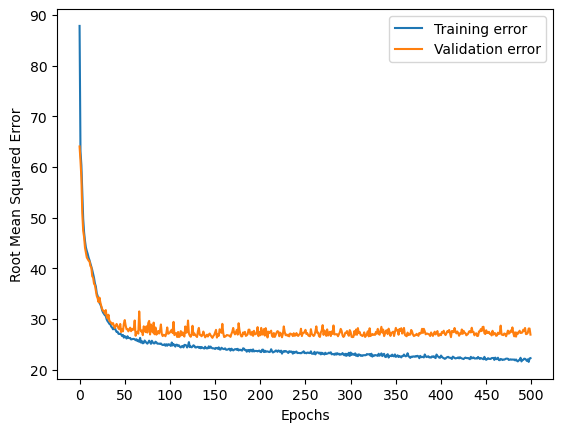

In [154]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(large_epoch_model_df_root_metrics["rmse"], label = 'Training error')
plt.plot(large_epoch_model_df_root_metrics["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

plt.xticks(np.arange(0, 500+1, 50.0))
plt.legend()

plt.show()

In [155]:
# Prediction on test set
X_test_scaled = st_scaler.transform(X_test)
y_pred = large_epoch_model.predict(X_test_scaled)

51/51 [==============================] - 0s 821us/step


In [156]:
#Performance
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAPE: {(mean_absolute_error(y_test, y_pred) / y_test.mean()) * 100:.2f}%")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")

MAE: 16.76
MSE: 780.65
MAPE: 22.03%
RMSE: 27.94


We can see that the model is already performing much better compared to our previous models.

## Dropout layers
However, we believe that the model is overfitting a bit, despite our efforts. Therefore we will add dropout layers to the same neural network in the next step.

In [177]:
large_drop_model = Sequential(
    [Dense(X_train.shape[1]*4, activation="relu", input_shape=[X_train.shape[1]]),
     Dense(X_train.shape[1]*4, activation="relu"),
     Dropout(0.2),
     Dense(X_train.shape[1]*4, activation="relu"),
     Dropout(0.2),
     Dense(X_train.shape[1]*4, activation="relu"),
     Dropout(0.2),
     Dense(1)])

In [178]:
large_drop_model.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [179]:
large_drop_model.summary()

Model: "sequential_1669"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5857 (Dense)          (None, 32)                288       
                                                                 
 dense_5858 (Dense)          (None, 32)                1056      
                                                                 
 dropout_16 (Dropout)        (None, 32)                0         
                                                                 
 dense_5859 (Dense)          (None, 32)                1056      
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                                                 
 dense_5860 (Dense)          (None, 32)                1056      
                                                                 
 dropout_18 (Dropout)        (None, 32)            

In [180]:
history_large_drop_model = large_drop_model.fit(X_train_scaled, y_train.values,
                   epochs=500, validation_split=0.2)

Epoch 1/500
163/163 [==============================] - 1s 3ms/step - loss: 7509.1035 - mae: 59.9642 - mse: 7509.1035 - val_loss: 4094.7668 - val_mae: 46.7211 - val_mse: 4094.7668
Epoch 2/500
163/163 [==============================] - 0s 2ms/step - loss: 4279.5269 - mae: 46.4674 - mse: 4279.5269 - val_loss: 3698.2642 - val_mae: 42.7537 - val_mse: 3698.2642
Epoch 3/500
163/163 [==============================] - 0s 2ms/step - loss: 3819.0171 - mae: 42.4911 - mse: 3819.0171 - val_loss: 3170.8281 - val_mae: 37.2993 - val_mse: 3170.8281
Epoch 4/500
163/163 [==============================] - 0s 2ms/step - loss: 3140.7319 - mae: 37.5601 - mse: 3140.7319 - val_loss: 2497.8127 - val_mae: 33.3474 - val_mse: 2497.8127
Epoch 5/500
163/163 [==============================] - 0s 2ms/step - loss: 2823.8743 - mae: 34.7010 - mse: 2823.8743 - val_loss: 2299.8308 - val_mae: 31.7103 - val_mse: 2299.8308
Epoch 6/500
163/163 [==============================] - 0s 2ms/step - loss: 2672.1953 - mae: 33.3791 - mse

Epoch 47/500
163/163 [==============================] - 0s 2ms/step - loss: 1110.4735 - mae: 21.2267 - mse: 1110.4735 - val_loss: 863.1260 - val_mae: 18.9582 - val_mse: 863.1260
Epoch 48/500
163/163 [==============================] - 0s 2ms/step - loss: 1081.7361 - mae: 20.9621 - mse: 1081.7361 - val_loss: 948.8001 - val_mae: 20.6021 - val_mse: 948.8001
Epoch 49/500
163/163 [==============================] - 0s 2ms/step - loss: 1068.9023 - mae: 21.0049 - mse: 1068.9023 - val_loss: 837.4872 - val_mae: 18.9644 - val_mse: 837.4872
Epoch 50/500
163/163 [==============================] - 0s 2ms/step - loss: 1061.5619 - mae: 21.0470 - mse: 1061.5619 - val_loss: 804.0566 - val_mae: 18.3957 - val_mse: 804.0566
Epoch 51/500
163/163 [==============================] - 0s 2ms/step - loss: 1089.5370 - mae: 20.9883 - mse: 1089.5370 - val_loss: 828.1385 - val_mae: 18.9754 - val_mse: 828.1385
Epoch 52/500
163/163 [==============================] - 0s 2ms/step - loss: 1057.3510 - mae: 21.0821 - mse: 10

163/163 [==============================] - 0s 2ms/step - loss: 974.4943 - mae: 19.7454 - mse: 974.4943 - val_loss: 760.4960 - val_mae: 17.9254 - val_mse: 760.4960
Epoch 94/500
163/163 [==============================] - 0s 2ms/step - loss: 975.6397 - mae: 19.9573 - mse: 975.6397 - val_loss: 765.6229 - val_mae: 17.6112 - val_mse: 765.6229
Epoch 95/500
163/163 [==============================] - 0s 2ms/step - loss: 934.5007 - mae: 19.7083 - mse: 934.5007 - val_loss: 819.7472 - val_mae: 18.4139 - val_mse: 819.7472
Epoch 96/500
163/163 [==============================] - 0s 2ms/step - loss: 924.5045 - mae: 19.5537 - mse: 924.5045 - val_loss: 776.6697 - val_mae: 17.9443 - val_mse: 776.6697
Epoch 97/500
163/163 [==============================] - 0s 2ms/step - loss: 958.4013 - mae: 19.6948 - mse: 958.4013 - val_loss: 757.0953 - val_mae: 17.9328 - val_mse: 757.0953
Epoch 98/500
163/163 [==============================] - 0s 2ms/step - loss: 985.1566 - mae: 19.9973 - mse: 985.1566 - val_loss: 772.9

163/163 [==============================] - 0s 2ms/step - loss: 955.2095 - mae: 19.8697 - mse: 955.2095 - val_loss: 767.3017 - val_mae: 17.5736 - val_mse: 767.3017
Epoch 140/500
163/163 [==============================] - 0s 2ms/step - loss: 943.3184 - mae: 19.7996 - mse: 943.3184 - val_loss: 774.7655 - val_mae: 17.4234 - val_mse: 774.7655
Epoch 141/500
163/163 [==============================] - 0s 2ms/step - loss: 963.7994 - mae: 19.8788 - mse: 963.7994 - val_loss: 767.2739 - val_mae: 17.3771 - val_mse: 767.2739
Epoch 142/500
163/163 [==============================] - 0s 2ms/step - loss: 928.0355 - mae: 19.5612 - mse: 928.0355 - val_loss: 805.8360 - val_mae: 17.8293 - val_mse: 805.8360
Epoch 143/500
163/163 [==============================] - 0s 2ms/step - loss: 914.3627 - mae: 19.5117 - mse: 914.3627 - val_loss: 787.2546 - val_mae: 17.7364 - val_mse: 787.2546
Epoch 144/500
163/163 [==============================] - 0s 2ms/step - loss: 941.5755 - mae: 19.5246 - mse: 941.5755 - val_loss: 

163/163 [==============================] - 0s 2ms/step - loss: 869.1295 - mae: 19.2013 - mse: 869.1295 - val_loss: 829.9249 - val_mae: 17.9397 - val_mse: 829.9249
Epoch 186/500
163/163 [==============================] - 0s 2ms/step - loss: 912.3737 - mae: 19.2646 - mse: 912.3737 - val_loss: 848.5255 - val_mae: 18.5846 - val_mse: 848.5255
Epoch 187/500
163/163 [==============================] - 0s 2ms/step - loss: 907.9607 - mae: 19.3848 - mse: 907.9607 - val_loss: 762.1675 - val_mae: 17.5155 - val_mse: 762.1675
Epoch 188/500
163/163 [==============================] - 0s 2ms/step - loss: 929.3919 - mae: 19.4945 - mse: 929.3919 - val_loss: 813.3484 - val_mae: 18.4302 - val_mse: 813.3484
Epoch 189/500
163/163 [==============================] - 0s 2ms/step - loss: 901.4200 - mae: 19.2477 - mse: 901.4200 - val_loss: 759.8196 - val_mae: 17.4476 - val_mse: 759.8196
Epoch 190/500
163/163 [==============================] - 0s 2ms/step - loss: 897.4370 - mae: 19.3387 - mse: 897.4370 - val_loss: 

163/163 [==============================] - 0s 2ms/step - loss: 859.7471 - mae: 18.9216 - mse: 859.7471 - val_loss: 810.2577 - val_mae: 18.1193 - val_mse: 810.2577
Epoch 232/500
163/163 [==============================] - 0s 2ms/step - loss: 854.9756 - mae: 18.9504 - mse: 854.9756 - val_loss: 787.6614 - val_mae: 17.6159 - val_mse: 787.6614
Epoch 233/500
163/163 [==============================] - 0s 2ms/step - loss: 874.6011 - mae: 19.1997 - mse: 874.6011 - val_loss: 754.6981 - val_mae: 17.3307 - val_mse: 754.6981
Epoch 234/500
163/163 [==============================] - 0s 2ms/step - loss: 855.8762 - mae: 18.9487 - mse: 855.8762 - val_loss: 757.7619 - val_mae: 17.4808 - val_mse: 757.7619
Epoch 235/500
163/163 [==============================] - 0s 2ms/step - loss: 875.7760 - mae: 18.9993 - mse: 875.7760 - val_loss: 775.8038 - val_mae: 17.4007 - val_mse: 775.8038
Epoch 236/500
163/163 [==============================] - 0s 2ms/step - loss: 874.8086 - mae: 18.9459 - mse: 874.8086 - val_loss: 

163/163 [==============================] - 0s 2ms/step - loss: 860.3943 - mae: 18.8313 - mse: 860.3943 - val_loss: 806.4778 - val_mae: 18.0674 - val_mse: 806.4778
Epoch 278/500
163/163 [==============================] - 0s 2ms/step - loss: 842.5073 - mae: 18.6995 - mse: 842.5073 - val_loss: 763.5163 - val_mae: 17.5849 - val_mse: 763.5163
Epoch 279/500
163/163 [==============================] - 0s 2ms/step - loss: 866.0613 - mae: 18.8317 - mse: 866.0613 - val_loss: 775.0643 - val_mae: 17.4960 - val_mse: 775.0643
Epoch 280/500
163/163 [==============================] - 0s 2ms/step - loss: 808.4365 - mae: 18.4748 - mse: 808.4365 - val_loss: 763.0147 - val_mae: 17.6638 - val_mse: 763.0147
Epoch 281/500
163/163 [==============================] - 0s 2ms/step - loss: 833.4521 - mae: 18.7949 - mse: 833.4521 - val_loss: 758.5005 - val_mae: 17.6064 - val_mse: 758.5005
Epoch 282/500
163/163 [==============================] - 0s 2ms/step - loss: 831.2902 - mae: 18.9063 - mse: 831.2902 - val_loss: 

163/163 [==============================] - 0s 2ms/step - loss: 849.4795 - mae: 18.7465 - mse: 849.4795 - val_loss: 758.8498 - val_mae: 17.7216 - val_mse: 758.8498
Epoch 324/500
163/163 [==============================] - 0s 2ms/step - loss: 795.8611 - mae: 18.4236 - mse: 795.8611 - val_loss: 787.9846 - val_mae: 17.9368 - val_mse: 787.9846
Epoch 325/500
163/163 [==============================] - 0s 2ms/step - loss: 801.2937 - mae: 18.4765 - mse: 801.2937 - val_loss: 764.0455 - val_mae: 17.8354 - val_mse: 764.0455
Epoch 326/500
163/163 [==============================] - 0s 2ms/step - loss: 838.6056 - mae: 18.6968 - mse: 838.6056 - val_loss: 751.2159 - val_mae: 17.4165 - val_mse: 751.2159
Epoch 327/500
163/163 [==============================] - 0s 2ms/step - loss: 805.6295 - mae: 18.4291 - mse: 805.6295 - val_loss: 804.1738 - val_mae: 17.8354 - val_mse: 804.1738
Epoch 328/500
163/163 [==============================] - 0s 2ms/step - loss: 842.2279 - mae: 18.7006 - mse: 842.2279 - val_loss: 

163/163 [==============================] - 0s 2ms/step - loss: 804.9738 - mae: 18.5398 - mse: 804.9738 - val_loss: 774.7983 - val_mae: 17.6839 - val_mse: 774.7983
Epoch 370/500
163/163 [==============================] - 0s 2ms/step - loss: 797.6349 - mae: 18.5217 - mse: 797.6349 - val_loss: 763.1108 - val_mae: 17.5516 - val_mse: 763.1108
Epoch 371/500
163/163 [==============================] - 0s 2ms/step - loss: 813.0535 - mae: 18.5480 - mse: 813.0535 - val_loss: 833.1772 - val_mae: 18.4742 - val_mse: 833.1772
Epoch 372/500
163/163 [==============================] - 0s 2ms/step - loss: 885.2574 - mae: 19.0009 - mse: 885.2574 - val_loss: 764.5939 - val_mae: 17.3836 - val_mse: 764.5939
Epoch 373/500
163/163 [==============================] - 0s 2ms/step - loss: 798.6304 - mae: 18.3652 - mse: 798.6304 - val_loss: 752.2734 - val_mae: 17.2661 - val_mse: 752.2734
Epoch 374/500
163/163 [==============================] - 0s 2ms/step - loss: 796.4315 - mae: 18.4206 - mse: 796.4315 - val_loss: 

163/163 [==============================] - 0s 2ms/step - loss: 809.9811 - mae: 18.5127 - mse: 809.9811 - val_loss: 779.4888 - val_mae: 17.5534 - val_mse: 779.4888
Epoch 416/500
163/163 [==============================] - 0s 2ms/step - loss: 797.5944 - mae: 18.2311 - mse: 797.5944 - val_loss: 753.3921 - val_mae: 17.2536 - val_mse: 753.3921
Epoch 417/500
163/163 [==============================] - 0s 2ms/step - loss: 793.5289 - mae: 18.5467 - mse: 793.5289 - val_loss: 756.1537 - val_mae: 17.6442 - val_mse: 756.1537
Epoch 418/500
163/163 [==============================] - 0s 2ms/step - loss: 772.8353 - mae: 18.1482 - mse: 772.8353 - val_loss: 761.0008 - val_mae: 17.5018 - val_mse: 761.0008
Epoch 419/500
163/163 [==============================] - 0s 2ms/step - loss: 824.0095 - mae: 18.5177 - mse: 824.0095 - val_loss: 773.7398 - val_mae: 17.8958 - val_mse: 773.7398
Epoch 420/500
163/163 [==============================] - 0s 2ms/step - loss: 772.3762 - mae: 18.3497 - mse: 772.3762 - val_loss: 

163/163 [==============================] - 0s 2ms/step - loss: 809.5847 - mae: 18.3285 - mse: 809.5847 - val_loss: 750.9380 - val_mae: 17.5311 - val_mse: 750.9380
Epoch 462/500
163/163 [==============================] - 0s 2ms/step - loss: 769.2615 - mae: 18.1636 - mse: 769.2615 - val_loss: 763.1482 - val_mae: 17.5800 - val_mse: 763.1482
Epoch 463/500
163/163 [==============================] - 0s 2ms/step - loss: 793.3696 - mae: 18.2166 - mse: 793.3696 - val_loss: 767.3474 - val_mae: 17.2583 - val_mse: 767.3474
Epoch 464/500
163/163 [==============================] - 0s 2ms/step - loss: 827.1549 - mae: 18.7372 - mse: 827.1549 - val_loss: 759.4020 - val_mae: 17.7713 - val_mse: 759.4020
Epoch 465/500
163/163 [==============================] - 0s 2ms/step - loss: 809.6091 - mae: 18.1287 - mse: 809.6091 - val_loss: 775.8173 - val_mae: 17.7074 - val_mse: 775.8173
Epoch 466/500
163/163 [==============================] - 0s 2ms/step - loss: 787.9638 - mae: 18.2426 - mse: 787.9638 - val_loss: 

In [181]:
large_drop_model.predict(X_train_scaled[:10])

1/1 [==============================] - 0s 79ms/step


array([[  6.240977],
       [  8.830669],
       [217.6342  ],
       [103.22858 ],
       [ 71.6028  ],
       [188.53725 ],
       [  9.11393 ],
       [147.88039 ],
       [135.82445 ],
       [119.68985 ]], dtype=float32)

In [182]:
large_drop_model_df_history = pd.DataFrame(history_large_drop_model.history)
large_drop_model_df_history

,loss,mae,mse,val_loss,val_mae,val_mse
0,7509.103516,59.964249,7509.103516,4094.766846,46.721069,4094.766846
1,4279.526855,46.467361,4279.526855,3698.264160,42.753742,3698.264160
2,3819.017090,42.491150,3819.017090,3170.828125,37.299271,3170.828125
3,3140.731934,37.560135,3140.731934,2497.812744,33.347370,2497.812744
4,2823.874268,34.700977,2823.874268,2299.830811,31.710342,2299.830811
...,...,...,...,...,...,...
495,749.228699,17.958332,749.228699,787.383484,17.837055,787.383484
496,813.029358,18.525043,813.029358,762.604004,17.903883,762.604004
497,811.284668,18.430813,811.284668,790.932556,18.183092,790.932556
498,788.988708,18.105930,788.988708,765.707520,17.653221,765.707520


In [183]:
large_drop_model_df_root_metrics = large_drop_model_df_history[["mse", "val_mse"]].apply(np.sqrt)
large_drop_model_df_root_metrics.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
large_drop_model_df_root_metrics

,rmse,val_rmse
0,86.655084,63.990365
1,65.418093,60.813355
2,61.798196,56.310107
3,56.042233,49.978123
4,53.140138,47.956551
...,...,...
495,27.372042,28.060354
496,28.513670,27.615286
497,28.483059,28.123523
498,28.088943,27.671421


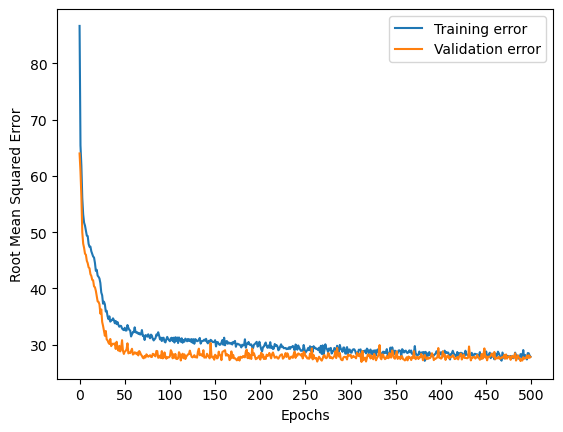

In [184]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(large_drop_model_df_root_metrics["rmse"], label = 'Training error')
plt.plot(large_drop_model_df_root_metrics["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

# plt.xlim([0, epochs])
# plt.xticks(range(2,10))
plt.xticks(np.arange(0, 500+1, 50.0))
plt.legend()

plt.show()

In [185]:
# Prediction on test set
X_test_scaled = st_scaler.transform(X_test)
y_pred = large_drop_model.predict(X_test_scaled)

51/51 [==============================] - 0s 941us/step


In [186]:
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAPE: {(mean_absolute_error(y_test, y_pred) / y_test.mean()) * 100:.2f}%")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")

MAE: 17.52
MSE: 754.99
MAPE: 23.02%
RMSE: 27.48


We tried to implement the dropout layers in order to improve performance, but our research showed that it is less necessary to use dropout layers when using the relu activation function. We wanted to experiment whether they would significantly impact the performance regardless. We found that using dropout layers did not impact the performance positively with each run due to the stochastical nature of neural networks but we kept our result in the notebook to show our efforts.

Outlook: The performance could be improved by adding more options as hyperparameters, e.g. batch size. This would increase the computational requirements by a lot. To improve our computational power we could adjust the Neural Network to be trained on our GPU or on remote servers with more computational power. 